In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import json
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf

c:\Users\thatb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\thatb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [10]:
with open("../candidates_dict.json","r") as f:
    candidates_dict = json.load(f)

In [9]:
updates_dict = [{"Name":"Mark E. Amodei","Party":"Republican","State":"Nevada",
"Winning Prob":[99], "twitter":["@MarkAmodeiNV2"]},
{"Name":"Elizabeth Krause","Party":"Democrat","State":"Nevada",
"Winning Prob":[1], "twitter":["@mercedes4nevada"]},
{"Name":"Matt Rosendale","Party":"Republican","State":"Montana",
"Winning Prob":[99], "twitter":["@RepRosendale","@MattForMontana"]},
{"Name":"Penny Ronning","Party":"Democrat","State":"Montana",
"Winning Prob":[1], "twitter":["@penny4congress"]},
{"Name":"Chris Stewart","Party":"Republican","State":"Utah",
"Winning Prob":[99], "twitter":["@RepChrisStewart"]},
{"Name":"Nick Mitchell","Party":"Democrat","State":"Utah",
"Winning Prob":[1], "twitter":["@Nick4utah"]},
{"Name":"Richard Hudson","Party":"Republican","State":"North Carolina",
"Winning Prob":[99], "twitter":["@RepRichHudson","@RepHudsonNC"]},
{"Name":"Ben Clark","Party":"Democrat","State":"North Carolina",
"Winning Prob":[1], "twitter":["@BenClarkNC"]},
{"Name":"Cori Bush","Party":"Democrat","State":"Missouri",
"Winning Prob":[99], "twitter":["@CoriBush","@RepCori"]},
{"Name":"Andrew Jones","Party":"Republican","State":"Missouri",
"Winning Prob":[1], "twitter":["@ajones4congress"]},
{"Name":"Zoe Lofgren","Party":"Democrat","State":"California",
"Winning Prob":[99], "twitter":["@RepZoeLofgren"]},
{"Name":"Peter Hernandez","Party":"Republican","State":"California",
"Winning Prob":[1], "twitter":["@hernandez_CA18"]},
{"Name":"Mary Gay Scanlon","Party":"Democrat","State":"Pennsylvania",
"Winning Prob":[99], "twitter":["@RepMGS","@marygayscanlon"]},
{"Name":"David Galluch","Party":"Republican","State":"Pennsylvania",
"Winning Prob":[1], "twitter":["@DaveGalluchPA"]}]

In [11]:
candidates_dict += updates_dict

In [12]:
candidates_dict[-1]

{'Name': 'David Galluch',
 'Party': 'Republican',
 'State': 'Pennsylvania',
 'Winning Prob': [1],
 'twitter': ['@DaveGalluchPA']}

In [13]:
with open("../candidates_dict.json","w") as f:
    json.dump(candidates_dict,f)

In [2]:
climate_tweets = pd.read_csv("./data/climate_sentiments_11_1.csv")
loan_tweets = pd.read_csv("./data/loan_sentiments_11_1.csv")

In [51]:
climate_tweets = climate_tweets.loc[climate_tweets['date'] >= datetime.strptime('01-01-2020', "%d-%m-%Y").date()]
loan_tweets = loan_tweets.loc[loan_tweets['date'] >= datetime.strptime('01-01-2020', "%d-%m-%Y").date()]

In [52]:
loan_tweets.head()

,Unnamed: 0.1,Unnamed: 0,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,...,user_statuses_count,user_time_zone,user_urls,user_verified,clean_text,topic_id,sentiment,confidence,Candidate,date
0,0,23.0,1.587124e+18,https://twitter.com/PattyMurray/status/1587124...,Mon Oct 31 16:47:39 +0000 2022,2022-10-31T16:47:39+00:00,PattyMurray,TODAY is the last day to apply for Public Serv...,quote,NaN,...,23410.0,NaN,http://murray.senate.gov/,True,TODAY is the last day to apply for Public Serv...,575.0,Neutral,0.920865,Patty Murray,2022-10-31
1,1,427.0,1.587157e+18,https://twitter.com/JamesForAR/status/15871571...,Mon Oct 31 18:58:48 +0000 2022,2022-10-31T18:58:48+00:00,JamesForAR,Today is the LAST DAY to apply for the Public ...,retweet,NaN,...,3424.0,NaN,http://JamesforArkansas.com,True,Today is the LAST DAY to apply for the Public ...,575.0,Neutral,0.893615,Natalie James,2022-10-31
2,2,471.0,1.586761e+18,https://twitter.com/SenDuckworth/status/158676...,Sun Oct 30 16:46:19 +0000 2022,2022-10-30T16:46:19+00:00,SenDuckworth,🚨Tomorrow is the last day to apply for the PSL...,original,NaN,...,10962.0,NaN,http://duckworth.senate.gov,True,policecarlight Tomorrow is the last day to ap...,575.0,Neutral,0.775948,Tammy Duckworth,2022-10-30
3,3,585.0,1.586730e+18,https://twitter.com/SenatorHassan/status/15867...,Sun Oct 30 14:41:29 +0000 2022,2022-10-30T14:41:29+00:00,SenatorHassan,For-profit colleges have targeted veterans whi...,original,NaN,...,12133.0,NaN,http://hassan.senate.gov,True,Forprofit colleges have targeted veterans whil...,497.0,Negative,0.434776,Maggie Hassan,2022-10-30
4,4,1080.0,1.574772e+18,https://twitter.com/salviforsenate/status/1574...,Tue Sep 27 14:43:08 +0000 2022,2022-09-27T14:43:08+00:00,salviforsenate,The CBO projects @TammyDuckworth’s support of ...,original,NaN,...,577.0,NaN,http://kathysalvi.com,True,The CBO projects TammyDuckworths support of st...,575.0,Neutral,0.335155,Kathy Salvi,2022-09-27


In [53]:
climate_tweets['date'] = pd.to_datetime(climate_tweets['parsed_created_at']).dt.date
loan_tweets['date'] = pd.to_datetime(loan_tweets['parsed_created_at']).dt.date

<ipython-input-53-c625a664264a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_tweets['date'] = pd.to_datetime(loan_tweets['parsed_created_at']).dt.date


In [54]:
climate_tweets['date'].head()

0    2022-10-31
1    2022-10-29
2    2022-10-29
3    2022-09-21
4    2022-08-23
Name: date, dtype: object

In [55]:
screen_name_map = {}
for candidate in candidates_dict:
    if "twitter" in candidate.keys():
        for screen_name in candidate['twitter']:
            screen_name = screen_name.replace("@","")
            screen_name_map.update({screen_name.lower():candidate['Name']})

In [56]:
climate_tweets['Candidate'] = climate_tweets['user_screen_name'].str.lower().map(screen_name_map)
loan_tweets['Candidate'] = loan_tweets['user_screen_name'].str.lower().map(screen_name_map)

<ipython-input-56-c92b52e98e2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_tweets['Candidate'] = loan_tweets['user_screen_name'].str.lower().map(screen_name_map)


In [57]:
climate_tweets.head()

,Unnamed: 0.1,Unnamed: 0,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,...,user_statuses_count,user_time_zone,user_urls,user_verified,clean_text,topic_id,sentiment,confidence,date,Candidate
0,0,74.0,1.587227e+18,https://twitter.com/ChrisVanHollen/status/1587...,Mon Oct 31 23:34:32 +0000 2022,2022-10-31T23:34:32+00:00,ChrisVanHollen,Great to celebrate the launch of Montgomery Co...,original,NaN,...,7425.0,NaN,https://www.vanhollen.senate.gov/,True,Great to celebrate the launch of Montgomery Co...,615.0,Positive,0.944720,2022-10-31,Chris Van Hollen
1,1,676.0,1.586459e+18,https://twitter.com/PattyMurray/status/1586459...,Sat Oct 29 20:46:28 +0000 2022,2022-10-29T20:46:28+00:00,PattyMurray,The climate crisis is one of the most serious ...,original,NaN,...,23406.0,NaN,http://murray.senate.gov/,True,The climate crisis is one of the most serious ...,26.0,Positive,0.767403,2022-10-29,Patty Murray
2,2,772.0,1.586416e+18,https://twitter.com/RepValDemings/status/15864...,Sat Oct 29 17:53:52 +0000 2022,2022-10-29T17:53:52+00:00,RepValDemings,Florida families cannot continue to have their...,original,NaN,...,14028.0,NaN,http://demings.house.gov,True,Florida families cannot continue to have their...,26.0,Positive,0.705050,2022-10-29,Val Demings
3,4,1560.0,1.572734e+18,https://twitter.com/TammyDuckworth/status/1572...,Wed Sep 21 23:46:03 +0000 2022,2022-09-21T23:46:03+00:00,TammyDuckworth,🚨🌎This is a BIG deal for our planet. The Kiga...,quote,NaN,...,4651.0,NaN,http://tammyduckworth.com/,True,policecarlight globeshowingAmericas This is ...,26.0,Positive,0.887755,2022-09-21,Tammy Duckworth
4,5,1606.0,1.562183e+18,https://twitter.com/TammyDuckworth/status/1562...,Tue Aug 23 21:01:10 +0000 2022,2022-08-23T21:01:10+00:00,TammyDuckworth,Students like @isudems are the future of our s...,original,NaN,...,4651.0,NaN,http://tammyduckworth.com/,True,Students like isudems are the future of our st...,26.0,Negative,0.905484,2022-08-23,Tammy Duckworth


In [146]:
climate_grouped = climate_tweets.groupby(['Candidate','date']).agg({"id":"count"})
loan_grouped = loan_tweets.groupby(['Candidate','date']).agg({"id":"count"})
climate_grouped.reset_index(inplace=True)
loan_grouped.reset_index(inplace=True)

In [147]:
climate_grouped['date'] = pd.to_datetime(climate_grouped['date'])
loan_grouped['date'] = pd.to_datetime(loan_grouped['date'])

In [148]:
climate_grouped_d = climate_grouped.groupby([pd.Grouper(key='date', freq='M')]).agg({'id':'count'})
loan_grouped_d = loan_grouped.groupby([pd.Grouper(key='date', freq='M')]).agg({'id':'count'})

In [116]:
climate_grouped_d.reset_index(inplace=True)
loan_grouped.reset_index(inplace=True)

[]

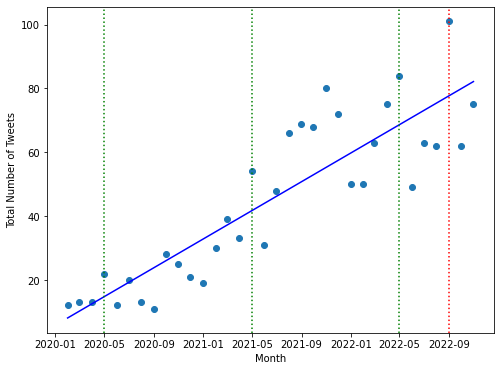

In [140]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(climate_grouped_d['date'], climate_grouped_d['id'])
x = mdates.date2num(climate_grouped_d['date'])
z = np.polyfit(x, climate_grouped_d['id'], 1)
p = np.poly1d(z)
ax.plot(x,p(x),"b")
ax.axvline(datetime.strptime('2020-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2021-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2022-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2022-08-31','%Y-%m-%d'), color = 'r', linestyle = 'dotted')
ax.set_xlabel("Month")
ax.set_ylabel("Total Number of Tweets")
ax.plot()

In [152]:
climate_grouped_w = climate_grouped.groupby([pd.Grouper(key='date', freq='W-Sun')]).agg({'id':'count'})
loan_grouped_w = loan_grouped.groupby([pd.Grouper(key='date', freq='W-Sun')]).agg({'id':'count'})
climate_grouped_w.reset_index(inplace=True)

In [153]:
climate_grouped_w.sort_values('date', inplace=True)
climate_grouped_w['delta'] = climate_grouped_w['id'].diff()

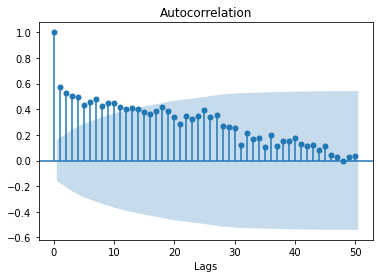

In [154]:
climate_grouped_AuTo = climate_grouped_w[['date','id']].set_index(['date'])

plot_acf(climate_grouped_AuTo, lags = 50)

plt.xlabel('Lags')

plt.show()

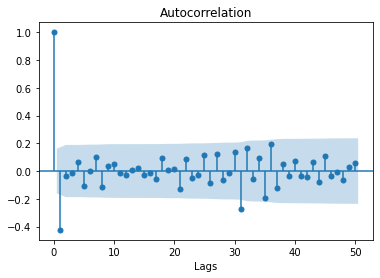

In [157]:
climate_grouped_AuTo = climate_grouped_w[['date','delta']].set_index(['date'])
climate_grouped_AuTo.dropna(inplace = True)
plot_acf(climate_grouped_AuTo, lags = 50)

plt.xlabel('Lags')

plt.show()

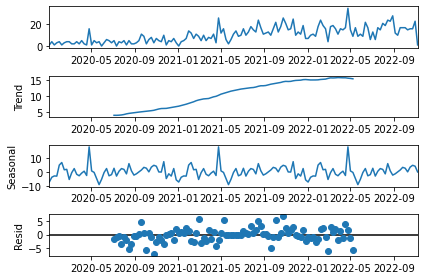

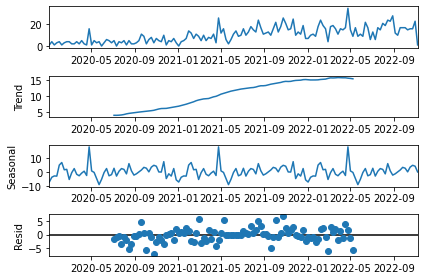

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose
season_climate = climate_grouped_w[['date','id']].set_index('date')
decomposition = seasonal_decompose(season_climate)
decomposition.plot()

In [163]:
close_election_map = {}
for candidate in candidates_dict:
    if candidate["Winning Prob"][0] >= 90 or candidate["Winning Prob"][0] <= 10:
        close_election_map.update({candidate['Name']:"Far"}) 
    else:
        close_election_map.update({candidate['Name']:"Close"}) 

In [164]:
climate_tweets['Election_Close'] = climate_tweets['Candidate'].map(close_election_map)
climate_tweets['Election_Close'].head()

0      Far
1      Far
2    Close
3      Far
4      Far
Name: Election_Close, dtype: object

In [168]:
closeness_grouped = climate_tweets.groupby(['Candidate','date','Election_Close']).agg({"id":"count"})
closeness_grouped.reset_index(inplace=True)
closeness_grouped['date'] = pd.to_datetime(closeness_grouped['date'])
closeness_grouped_m = closeness_grouped.groupby([pd.Grouper(key='date', freq='M'), "Election_Close"]).agg({'id':'count'})
closeness_grouped_m.reset_index(inplace=True)
closeness_grouped_close = closeness_grouped_m.loc[closeness_grouped_m['Election_Close'] == 'Close']
closeness_grouped_far = closeness_grouped_m.loc[closeness_grouped_m['Election_Close'] == 'Far']

[]

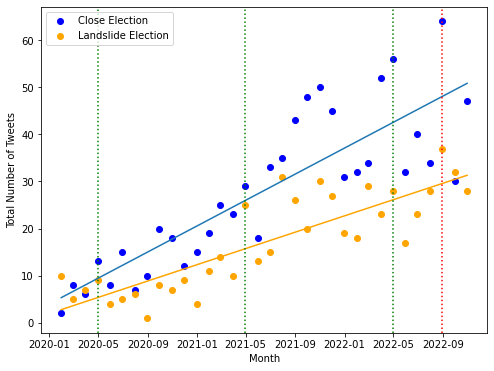

In [177]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(closeness_grouped_close['date'], closeness_grouped_close['id'], label = "Close Election", c="b")
ax.scatter(closeness_grouped_far['date'], closeness_grouped_far['id'], label = "Landslide Election", c="orange")
x = mdates.date2num(closeness_grouped_close['date'])
z = np.polyfit(x, closeness_grouped_close['id'], 1)
p = np.poly1d(z)
ax.plot(x,p(x))
x = mdates.date2num(closeness_grouped_far['date'])
z = np.polyfit(x, closeness_grouped_far['id'], 1)
p = np.poly1d(z)
ax.plot(x,p(x),c = "orange")
ax.axvline(datetime.strptime('2020-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2021-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2022-04-30','%Y-%m-%d'), color = 'g', linestyle = 'dotted')
ax.axvline(datetime.strptime('2022-08-31','%Y-%m-%d'), color = 'r', linestyle = 'dotted')
ax.set_xlabel("Month")
ax.set_ylabel("Total Number of Tweets")
ax.legend(loc = 0)
ax.plot()

In [191]:
closeness_grouped = climate_tweets.groupby(['Candidate','date','Election_Close']).agg({"id":"count"})
closeness_grouped.reset_index(inplace=True)
closeness_grouped['date'] = pd.to_datetime(closeness_grouped['date'])
closeness_grouped_m = closeness_grouped.groupby([pd.Grouper(key='date', freq='W-Sun'), "Election_Close"]).agg({'id':'count'})
closeness_grouped_m.reset_index(inplace=True)
closeness_grouped_close = closeness_grouped_m.loc[closeness_grouped_m['Election_Close'] == 'Close']
closeness_grouped_far = closeness_grouped_m.loc[closeness_grouped_m['Election_Close'] == 'Far']

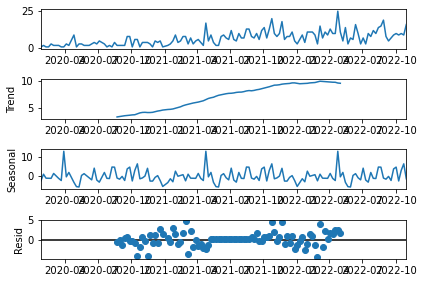

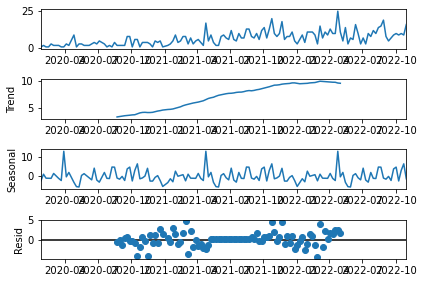

In [197]:
season_climate_close = closeness_grouped_close[['date','id']].set_index('date')
decomposition = seasonal_decompose(season_climate_close, period=52)
decomposition.plot()

# Extra analysis

In [78]:
candidates_party = {}
for candidate in candidates_dict:
    candidates_party.update({candidate['Name']: candidate['Party']})

climate_tweets['party'] = climate_tweets['Candidate'].map(candidates_party)
loan_tweets['party'] = loan_tweets['Candidate'].map(candidates_party)

In [79]:
climate_tweets.groupby(['party']).size()

party
Democrat       1458
Independent      18
Republican      262
dtype: int64

In [122]:
climate_grouped_party = climate_tweets.groupby(['Candidate','party','date']).agg({"id":"count"})
loan_grouped_party = loan_tweets.groupby(['Candidate','party','date']).agg({"id":"count"})
climate_grouped_party.reset_index(inplace=True)
loan_grouped_party.reset_index(inplace=True)

In [123]:
climate_grouped_party['date'] = pd.to_datetime(climate_grouped_party['date'])
loan_grouped_party['date'] = pd.to_datetime(loan_grouped_party['date'])

In [124]:
loan_grouped_party.groupby([pd.Grouper(key='date', freq='M')]).agg({'id':'count'})

,id
date,
2020-01-31,8
2020-02-29,10
2020-03-31,8
2020-04-30,10
2020-05-31,15
2020-06-30,21
2020-07-31,11
2020-08-31,10
2020-09-30,9
